<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

### Working on the project with DBSCAN clustering algorithm

##### Installing Plotly

In [1]:
!pip install plotly

  Using cached plotly-5.5.0-py2.py3-none-any.whl (26.5 MB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


##### Importing adequate librairies

In [2]:
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe_connected"

##### Loading the dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/uber-tlc-foil-response/master/uber-trip-data/uber-raw-data-apr14.csv")

##### Understanding the overall structure of the dataset

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
print ("The dataset contains {} observations".format(df.shape[0]))

The dataset contains 564516 observations


In [6]:
print ("The dataset contains {} columns".format(df.shape[1]))

The dataset contains 4 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


##### Take a sample of 100 000 observations from the dataset

In [8]:
dataset = df.sample(100000)
dataset.head()

,Date/Time,Lat,Lon,Base
264036,4/13/2014 0:15:00,40.7436,-73.9537,B02617
93727,4/12/2014 7:37:00,40.7138,-74.0066,B02598
226177,4/3/2014 7:16:00,40.7790,-73.9873,B02617
98088,4/12/2014 22:27:00,40.6465,-73.7896,B02598
326296,4/30/2014 21:52:00,40.7435,-73.9727,B02617


##### Converting "Date/Time" column to datetime format

In [9]:
dataset["Date/Time"] = pd.to_datetime(dataset["Date/Time"])

##### Verifying that the dataframe does not contain any missing values

In [10]:
dataset.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 264036 to 204443
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date/Time  100000 non-null  datetime64[ns]
 1   Lat        100000 non-null  float64       
 2   Lon        100000 non-null  float64       
 3   Base       100000 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.8+ MB


In [12]:
sample_data = dataset

##### Basic feature engineering from after conversion of "Date/Time" column to datetime format

In [13]:
sample_data["Year"] = sample_data["Date/Time"].dt.year
sample_data["Month"] = sample_data["Date/Time"].dt.month
sample_data["Day"] = sample_data["Date/Time"].dt.day
sample_data["Hour"] = sample_data["Date/Time"].dt.hour
sample_data["Minutes"] = sample_data["Date/Time"].dt.minute
sample_data["DayOfWeek"] = sample_data["Date/Time"].dt.day_name()

In [14]:
sample_data.head(3)

,Date/Time,Lat,Lon,Base,Year,Month,Day,Hour,Minutes,DayOfWeek
264036,2014-04-13 00:15:00,40.7436,-73.9537,B02617,2014,4,13,0,15,Sunday
93727,2014-04-12 07:37:00,40.7138,-74.0066,B02598,2014,4,12,7,37,Saturday
226177,2014-04-03 07:16:00,40.7790,-73.9873,B02617,2014,4,3,7,16,Thursday


##### Dropping "Date/Time" and "Base" column before further processing

In [15]:
sample_data = sample_data.drop(columns=["Date/Time", "Base"])

In [16]:
sample_data.head()

,Lat,Lon,Year,Month,Day,Hour,Minutes,DayOfWeek
264036,40.7436,-73.9537,2014,4,13,0,15,Sunday
93727,40.7138,-74.0066,2014,4,12,7,37,Saturday
226177,40.7790,-73.9873,2014,4,3,7,16,Thursday
98088,40.6465,-73.7896,2014,4,12,22,27,Saturday
326296,40.7435,-73.9727,2014,4,30,21,52,Wednesday


In [17]:
sample_data.shape

(100000, 8)

##### Verifying that "DayOfWeek" column contains all the 7 days of the week

In [18]:
sample_data["DayOfWeek"].unique()

array(['Sunday', 'Saturday', 'Thursday', 'Wednesday', 'Tuesday', 'Friday',
       'Monday'], dtype=object)

##### Verifying that "Day" column contains all the 30 days of April

In [19]:
sample_data["Day"].unique()

array([13, 12,  3, 30, 19, 29, 15,  2, 11, 27, 17, 21, 20, 25, 10, 22, 16,
       28,  4,  8,  9, 26,  7, 18,  5,  6, 23,  1, 24, 14])

In [20]:
len(sample_data["Day"].unique())

30

##### Verifying the values in the "Hour" column

In [21]:
sample_data["Hour"].unique()

array([ 0,  7, 22, 21, 13, 18, 11,  5,  8,  6, 17, 15, 16, 20, 19,  9, 14,
       12,  1, 10,  3,  4, 23,  2])

In [22]:
len(sample_data["Hour"].unique())

24

##### Creating dataframes for information concerning each of the seven days of the week for April

In [23]:
monday = sample_data[sample_data.DayOfWeek == "Monday"]

In [24]:
tuesday = sample_data[sample_data.DayOfWeek == "Tuesday"]

In [25]:
wednesday = sample_data[sample_data.DayOfWeek == "Wednesday"]

In [26]:
thursday = sample_data[sample_data.DayOfWeek == "Thursday"]

In [27]:
friday = sample_data[sample_data.DayOfWeek == "Friday"]

In [28]:
saturday = sample_data[sample_data.DayOfWeek == "Saturday"]

In [29]:
sunday = sample_data[sample_data.DayOfWeek == "Sunday"]

##### Verifying that the number of rows of each of the dataframes add up to the total number of rows of the original dataset

In [30]:
monday.shape[0]+tuesday.shape[0]+wednesday.shape[0]+thursday.shape[0]+friday.shape[0]+saturday.shape[0]+sunday.shape[0]

100000

##### Creating dataframes for information concerning each of the 24 hours of the day

In [31]:
midnight = sample_data[sample_data.Hour == 0]

In [32]:
one = sample_data[sample_data.Hour == 1]

In [33]:
two = sample_data[sample_data.Hour == 2]

In [34]:
three = sample_data[sample_data.Hour == 3]

In [35]:
four = sample_data[sample_data.Hour == 4]

In [36]:
five = sample_data[sample_data.Hour == 5]

In [37]:
six = sample_data[sample_data.Hour == 6]

In [38]:
seven = sample_data[sample_data.Hour == 7]

In [39]:
eight = sample_data[sample_data.Hour == 8]

In [40]:
nine = sample_data[sample_data.Hour == 9]

In [41]:
ten = sample_data[sample_data.Hour == 10]

In [42]:
eleven = sample_data[sample_data.Hour == 11]

In [43]:
twelve = sample_data[sample_data.Hour == 12]

In [44]:
thirteen = sample_data[sample_data.Hour == 13]

In [45]:
fourteen = sample_data[sample_data.Hour == 14]

In [46]:
fifteen = sample_data[sample_data.Hour == 15]

In [47]:
sixteen = sample_data[sample_data.Hour == 16]

In [48]:
seventeen = sample_data[sample_data.Hour == 17]

In [49]:
eighteen = sample_data[sample_data.Hour == 18]

In [50]:
nineteen = sample_data[sample_data.Hour == 19]

In [51]:
twenty = sample_data[sample_data.Hour == 20]

In [52]:
twenty_one = sample_data[sample_data.Hour == 21]

In [53]:
twenty_two = sample_data[sample_data.Hour == 22]

In [54]:
twenty_three = sample_data[sample_data.Hour == 23]

##### Verifying that the number of rows of each of the dataframes add up to the total number of rows of the original dataset

In [55]:
one.shape[0]+two.shape[0]+three.shape[0]+four.shape[0]+five.shape[0]+six.shape[0]+seven.shape[0]+eight.shape[0]+nine.shape[0]+ten.shape[0]+eleven.shape[0]+twelve.shape[0]+thirteen.shape[0]+fourteen.shape[0]+fifteen.shape[0]+sixteen.shape[0]+seventeen.shape[0]+eighteen.shape[0]+nineteen.shape[0]+twenty.shape[0]+twenty_one.shape[0]+twenty_two.shape[0]+twenty_three.shape[0]+midnight.shape[0]

100000

### Picking one day at a given hour, as asked in the exercise, for a test

In [56]:
sunday_noon = sunday[sunday.Hour == 12]
sunday_noon.head()

,Lat,Lon,Year,Month,Day,Hour,Minutes,DayOfWeek
240302,40.7389,-73.9915,2014,4,6,12,12,Sunday
63786,40.7505,-73.9694,2014,4,6,12,55,Sunday
471534,40.7570,-73.9720,2014,4,20,12,23,Sunday
311707,40.7367,-73.9792,2014,4,27,12,0,Sunday
372961,40.7056,-74.0080,2014,4,6,12,51,Sunday


In [57]:
sunday_noon.shape

(430, 8)

##### Dropping unnecessary columns of the dataset

In [58]:
sunday_noon = sunday_noon.drop(columns=["Year", "Month", "Day"])

In [59]:
sunday_noon.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
240302,40.7389,-73.9915,12,12,Sunday
63786,40.7505,-73.9694,12,55,Sunday
471534,40.7570,-73.9720,12,23,Sunday
311707,40.7367,-73.9792,12,0,Sunday
372961,40.7056,-74.0080,12,51,Sunday


##### A scatterplot to show how the pick-up points are scattered in New York city on Sundays between noon and 12 h 59

In [178]:
fig_sunday_noon = px.scatter_mapbox(
        sunday_noon, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_sunday_noon.show()

##### Scaling numerical data and one-hot encoding categorical data

In [61]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(sunday_noon.head())
scaled_X_sunday_noon = preprocessor.fit_transform(sunday_noon)
print('...Completed.')
print(scaled_X_sunday_noon[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
240302  40.7389 -73.9915    12       12    Sunday
63786   40.7505 -73.9694    12       55    Sunday
471534  40.7570 -73.9720    12       23    Sunday
311707  40.7367 -73.9792    12        0    Sunday
372961  40.7056 -74.0080    12       51    Sunday
...Completed.
[[ 0.04882641 -0.27928243  0.         -1.00153037]
 [ 0.31934308  0.07691418  0.          1.50772391]
 [ 0.47092569  0.0350087   0.         -0.35962812]
 [-0.00247847 -0.08103726  0.         -1.70178738]
 [-0.72774297 -0.54522107  0.          1.27430491]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [62]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.001, 3, 100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_sunday_noon.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_sunday_noon)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

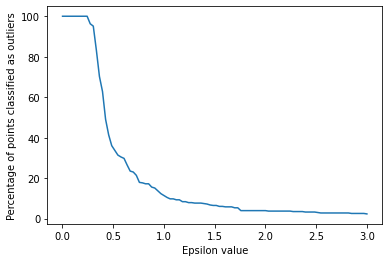

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.001, 3, 100),y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Following the litterature on DBSCAN, min_samples should be two times the number of dimensions

In [64]:
min_samples = (2*sunday_noon.shape[1])
min_samples

10

##### Retraining a DBSCAN model with epsilon value = 0.6, based on the plot created above, and min_samples = 8

In [65]:
eps = 0.6
min_samples = 8
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_sunday_noon)

DBSCAN(algorithm='brute', eps=0.6, metric='manhattan', min_samples=8)

In [66]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0]), array([128, 302]))

In [67]:
sunday_noon["cluster"] = dbscan.labels_
sunday_noon.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
240302,40.7389,-73.9915,12,12,Sunday,0
63786,40.7505,-73.9694,12,55,Sunday,0
471534,40.7570,-73.9720,12,23,Sunday,0
311707,40.7367,-73.9792,12,0,Sunday,0
372961,40.7056,-74.0080,12,51,Sunday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points in New York city, except outliers on Sundays from noon to 12 h 59

In [179]:
fig_sunday_noon_cluster = px.scatter_mapbox(
        sunday_noon[sunday_noon.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_sunday_noon_cluster.show()

### Picking Sunday to observe how the clustering algorithm behaves

In [69]:
sunday.shape

(8923, 8)

In [180]:
fig_sunday = px.scatter_mapbox(
        sunday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_sunday.show()

##### Dropping unnecessary columns of the dataset

In [71]:
sunday = sunday.drop(columns=["Year", "Month", "Day"])

In [72]:
sunday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
264036,40.7436,-73.9537,0,15,Sunday
311372,40.6994,-73.9471,8,44,Sunday
470569,40.7341,-74.0081,5,13,Sunday
188566,40.7472,-73.9776,14,59,Sunday
264925,40.7669,-73.9791,11,48,Sunday


##### Scaling numerical data and one-hot encoding categorical data

In [73]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(sunday.head())
scaled_X_sunday = preprocessor.fit_transform(sunday)
print('...Completed.')
print(scaled_X_sunday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
264036  40.7436 -73.9537     0       15    Sunday
311372  40.6994 -73.9471     8       44    Sunday
470569  40.7341 -74.0081     5       13    Sunday
188566  40.7472 -73.9776    14       59    Sunday
264925  40.7669 -73.9791    11       48    Sunday
...Completed.
[[ 0.26172219  0.28515837 -1.72012334 -0.80713652]
 [-0.82239466  0.3921136  -0.56735632  0.86249029]
 [ 0.02871065 -0.596412   -0.99964395 -0.9222832 ]
 [ 0.35002131 -0.1021492   0.29721894  1.72609037]
 [ 0.83321366 -0.12645721 -0.13506869  1.09278364]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [74]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_sunday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_sunday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

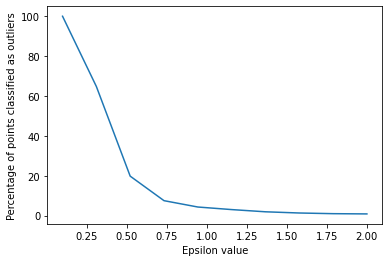

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.75, based on the plot created above, and min_samples = 6

In [76]:
eps = 0.75
min_samples = 6

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_sunday)

DBSCAN(algorithm='brute', eps=0.75, metric='manhattan', min_samples=6)

In [77]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4]), array([ 535, 7988,  291,   77,   26,    6]))

In [78]:
sunday["cluster"] = dbscan.labels_
sunday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
264036,40.7436,-73.9537,0,15,Sunday,0
311372,40.6994,-73.9471,8,44,Sunday,0
470569,40.7341,-74.0081,5,13,Sunday,0
188566,40.7472,-73.9776,14,59,Sunday,0
264925,40.7669,-73.9791,11,48,Sunday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Sundays

In [177]:
fig_sunday_cluster = px.scatter_mapbox(
        sunday[sunday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_sunday_cluster.show()

### Picking Monday to observe how the clustering algorithm behaves

In [80]:
monday.shape

(10851, 8)

In [176]:
fig_monday = px.scatter_mapbox(
        monday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_monday.show()

##### Dropping unnecessary columns of the dataset

In [82]:
monday = monday.drop(columns=["Year", "Month", "Day"])

In [83]:
monday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
143425,40.7312,-74.0014,17,18,Monday
191329,40.7224,-73.9576,5,3,Monday
8681,40.7418,-74.0073,18,13,Monday
479413,40.7439,-73.9879,22,21,Monday
8467,40.7269,-73.9915,16,58,Monday


##### Scaling numerical data and one-hot encoding categorical data

In [84]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(monday.head())
scaled_X_monday = preprocessor.fit_transform(monday)
print('...Completed.')
print(scaled_X_monday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
143425  40.7312 -74.0014    17       18    Monday
191329  40.7224 -73.9576     5        3    Monday
8681    40.7418 -74.0073    18       13    Monday
479413  40.7439 -73.9879    22       21    Monday
8467    40.7269 -73.9915    16       58    Monday
...Completed.
[[-0.2368569  -0.50733763  0.54670453 -0.6709109 ]
 [-0.4638698   0.26012169 -1.6374968  -1.54324031]
 [ 0.03659045 -0.61071685  0.7287213  -0.96168737]
 [ 0.09076398 -0.27079195  1.45678841 -0.49644502]
 [-0.34778366 -0.3338708   0.36468775  1.65530086]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [85]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_monday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_monday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

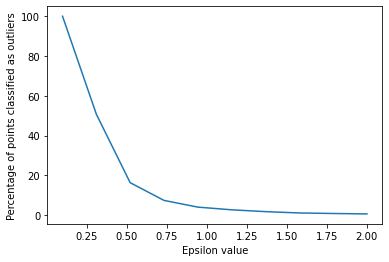

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [87]:
eps = 0.5
min_samples = 8

dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_monday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [88]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([1927, 8228,  295,  225,   61,   16,    8,   16,   31,   11,   11,
          15,    7]))

In [89]:
monday["cluster"] = dbscan.labels_
monday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
143425,40.7312,-74.0014,17,18,Monday,0
191329,40.7224,-73.9576,5,3,Monday,-1
8681,40.7418,-74.0073,18,13,Monday,0
479413,40.7439,-73.9879,22,21,Monday,0
8467,40.7269,-73.9915,16,58,Monday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Mondays

In [159]:
fig_monday_cluster = px.scatter_mapbox(
        monday[monday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_monday_cluster.show()

### Picking Tuesday to observe how the clustering algorithm behaves

In [91]:
tuesday.shape

(16242, 8)

In [160]:
fig_tuesday = px.scatter_mapbox(
        tuesday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)
fig_tuesday.show()

##### Dropping unnecessary columns of the dataset

In [93]:
tuesday = tuesday.drop(columns=["Year", "Month", "Day"])

In [94]:
tuesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
319024,40.7409,-73.9851,18,55,Tuesday
204546,40.7447,-73.9797,21,22,Tuesday
270220,40.8894,-73.9458,13,52,Tuesday
147808,40.7232,-73.9976,15,42,Tuesday
72402,40.7213,-74.0016,9,37,Tuesday


##### Scaling numerical data and one-hot encoding categorical data

In [95]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(tuesday.head())
scaled_X_tuesday = preprocessor.fit_transform(tuesday)
print('...Completed.')
print(scaled_X_tuesday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
319024  40.7409 -73.9851    18       55   Tuesday
204546  40.7447 -73.9797    21       22   Tuesday
270220  40.8894 -73.9458    13       52   Tuesday
147808  40.7232 -73.9976    15       42   Tuesday
72402   40.7213 -74.0016     9       37   Tuesday
...Completed.
[[-0.0307187  -0.16272162  0.64938051  1.47387791]
 [ 0.07644957 -0.05291579  1.20310914 -0.43420759]
 [ 4.15730482  0.63642077 -0.27350053  1.30041559]
 [-0.52989727 -0.41690176  0.09565189  0.72220786]
 [-0.58348141 -0.49823941 -1.01180536  0.433104  ]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [96]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_tuesday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_tuesday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

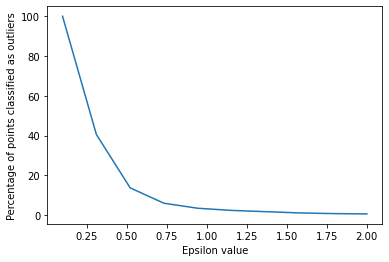

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [98]:
eps = 0.5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_tuesday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [99]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([ 2421, 13085,   103,    28,   178,    64,    22,    11,    15,
           34,    36,     8,    24,    12,    28,     7,    19,    23,
           15,     8,    12,     8,     7,     8,     7,    10,    14,
            9,     2,     3,     7,     8,     6]))

In [100]:
tuesday["cluster"] = dbscan.labels_
tuesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
319024,40.7409,-73.9851,18,55,Tuesday,0
204546,40.7447,-73.9797,21,22,Tuesday,0
270220,40.8894,-73.9458,13,52,Tuesday,-1
147808,40.7232,-73.9976,15,42,Tuesday,0
72402,40.7213,-74.0016,9,37,Tuesday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Tuesdays

In [161]:
fig_tuesday_cluster = px.scatter_mapbox(
        tuesday[tuesday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_tuesday_cluster.show()

### Picking Wednesday to observe how the clustering algorithm behaves

In [102]:
wednesday.shape

(19255, 8)

In [162]:
fig_wednesday = px.scatter_mapbox(
        wednesday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_wednesday.show()

##### Dropping unnecessary columns of the dataset

In [104]:
wednesday = wednesday.drop(columns=["Year", "Month", "Day"])

In [105]:
wednesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
326296,40.7435,-73.9727,21,52,Wednesday
555032,40.7623,-73.9682,11,52,Wednesday
115644,40.7143,-74.0086,16,2,Wednesday
325676,40.6420,-73.7883,20,28,Wednesday
394260,40.7433,-73.9855,14,34,Wednesday


##### Scaling numerical data and one-hot encoding categorical data

In [106]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(wednesday.head())
scaled_X_wednesday = preprocessor.fit_transform(wednesday)
print('...Completed.')
print(scaled_X_wednesday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes  DayOfWeek
326296  40.7435 -73.9727    21       52  Wednesday
555032  40.7623 -73.9682    11       52  Wednesday
115644  40.7143 -74.0086    16        2  Wednesday
325676  40.6420 -73.7883    20       28  Wednesday
394260  40.7433 -73.9855    14       34  Wednesday
...Completed.
[[ 0.02251492  0.1098951   1.19053738  1.30138599]
 [ 0.56945396  0.20482293 -0.6669641   1.30138599]
 [-0.82698613 -0.64741809  0.26178664 -1.57971319]
 [-2.93037402  3.99982688  1.00478723 -0.08154162]
 [ 0.01669642 -0.16012186 -0.10971366  0.26419029]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [107]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_wednesday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_wednesday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

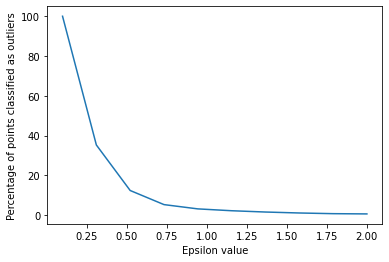

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [109]:
eps = 0.5
min_samples = 8
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_wednesday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [110]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 array([ 2580, 15882,   247,    94,    13,    48,    16,    17,    81,
            9,    12,    55,    14,    13,    15,    17,     3,    13,
           11,    12,     6,    17,     7,     8,     7,    10,     8,
            7,     8,     9,    10,     6]))

In [111]:
wednesday["cluster"] = dbscan.labels_
wednesday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
326296,40.7435,-73.9727,21,52,Wednesday,0
555032,40.7623,-73.9682,11,52,Wednesday,0
115644,40.7143,-74.0086,16,2,Wednesday,0
325676,40.6420,-73.7883,20,28,Wednesday,1
394260,40.7433,-73.9855,14,34,Wednesday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Wednesdays

In [163]:
fig_wednesday_cluster = px.scatter_mapbox(
        wednesday[wednesday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_wednesday_cluster.show()

### Picking Thursday to observe how the clustering algorithm behaves

In [113]:
thursday.shape

(15078, 8)

In [164]:
fig_thursday = px.scatter_mapbox(
        thursday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_thursday.show()

##### Dropping unnecessary columns of the dataset

In [115]:
thursday = thursday.drop(columns=["Year", "Month", "Day"])

In [116]:
thursday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
226177,40.7790,-73.9873,7,16,Thursday
119130,40.7308,-74.0053,6,38,Thursday
226220,40.7287,-73.9861,7,27,Thursday
82365,40.7543,-73.9739,11,48,Thursday
402053,40.7254,-73.9966,15,42,Thursday


##### Scaling numerical data and one-hot encoding categorical data

In [117]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(thursday.head())
scaled_X_thursday = preprocessor.fit_transform(thursday)
print('...Completed.')
print(scaled_X_thursday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
226177  40.7790 -73.9873     7       16  Thursday
119130  40.7308 -74.0053     6       38  Thursday
226220  40.7287 -73.9861     7       27  Thursday
82365   40.7543 -73.9739    11       48  Thursday
402053  40.7254 -73.9966    15       42  Thursday
...Completed.
[[ 1.10562475 -0.18833127 -1.45489825 -0.78749559]
 [-0.31501482 -0.5671427  -1.63623886  0.4872634 ]
 [-0.3769099  -0.16307717 -1.45489825 -0.15011609]
 [ 0.37762066  0.0936728  -0.72953578  1.0666993 ]
 [-0.47417361 -0.38405051 -0.00417331  0.71903776]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [118]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_thursday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_thursday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

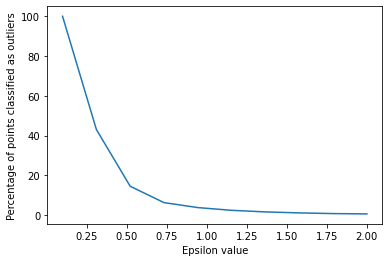

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [120]:
eps = 0.5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_thursday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [121]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
 array([ 2396, 11998,   248,   130,    23,    20,    12,    22,    41,
           37,    17,     8,     8,     7,    13,     9,     8,     9,
            5,     8,     5,    15,     8,     8,     8,     8,     7]))

In [122]:
thursday["cluster"] = dbscan.labels_
thursday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
226177,40.7790,-73.9873,7,16,Thursday,0
119130,40.7308,-74.0053,6,38,Thursday,0
226220,40.7287,-73.9861,7,27,Thursday,0
82365,40.7543,-73.9739,11,48,Thursday,0
402053,40.7254,-73.9966,15,42,Thursday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Thursdays

In [165]:
fig_thursday_cluster = px.scatter_mapbox(
        thursday[thursday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_thursday_cluster.show()

### Picking Friday to observe how the clustering algorithm behaves

In [124]:
friday.shape

(15991, 8)

In [125]:
fig_friday = px.scatter_mapbox(
        friday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_friday.show()

##### Dropping unnecessary columns of the dataset

In [126]:
friday = friday.drop(columns=["Year", "Month", "Day"])

In [127]:
friday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
12701,40.7330,-73.9961,5,34,Friday
562503,40.7326,-73.9969,21,1,Friday
234387,40.7277,-73.9837,20,58,Friday
54521,40.7549,-73.9705,19,47,Friday
171840,40.7645,-73.9728,18,9,Friday


##### Scaling numerical data and one-hot encoding categorical data

In [128]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(friday.head())
scaled_X_friday = preprocessor.fit_transform(friday)
print('...Completed.')
print(scaled_X_friday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
12701   40.7330 -73.9961     5       34    Friday
562503  40.7326 -73.9969    21        1    Friday
234387  40.7277 -73.9837    20       58    Friday
54521   40.7549 -73.9705    19       47    Friday
171840  40.7645 -73.9728    18        9    Friday
...Completed.
[[-0.22368226 -0.37605887 -1.73677079  0.23675765]
 [-0.23502112 -0.39371084  1.01349521 -1.6742187 ]
 [-0.37392227 -0.10245318  0.84160358  1.62655863]
 [ 0.39712083  0.18880449  0.66971196  0.98956652]
 [ 0.66925368  0.13805505  0.49782033 -1.2109517 ]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [129]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_friday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_friday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

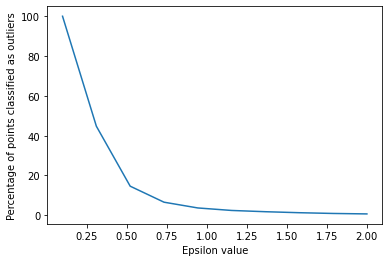

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.5, based on the plot created above, and min_samples = 8

In [131]:
eps = 0.5
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_friday)

DBSCAN(algorithm='brute', metric='manhattan', min_samples=8)

In [132]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 array([ 2578, 12802,   165,     5,    32,     6,    69,    35,    79,
           25,    24,     8,    20,    10,     8,     8,     8,    20,
           15,    12,     8,     5,    12,     7,     8,     8,     7,
            7]))

In [133]:
friday["cluster"] = dbscan.labels_
friday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
12701,40.7330,-73.9961,5,34,Friday,0
562503,40.7326,-73.9969,21,1,Friday,0
234387,40.7277,-73.9837,20,58,Friday,0
54521,40.7549,-73.9705,19,47,Friday,0
171840,40.7645,-73.9728,18,9,Friday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Fridays

In [166]:
fig_friday_cluster = px.scatter_mapbox(
        friday[friday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_friday_cluster.show()

### Picking Saturday to observe how the clustering algorithm behaves

In [135]:
saturday.shape

(13660, 8)

In [167]:
fig_saturday = px.scatter_mapbox(
        saturday, 
        lat="Lat", 
        lon="Lon",
        mapbox_style="carto-positron"
)

fig_saturday.show()

##### Dropping unnecessary columns of the dataset

In [137]:
saturday = saturday.drop(columns=["Year", "Month", "Day"])

In [138]:
saturday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek
93727,40.7138,-74.0066,7,37,Saturday
98088,40.6465,-73.7896,22,27,Saturday
466158,40.6884,-73.9628,13,45,Saturday
519354,40.7226,-73.9890,20,9,Saturday
368277,40.7353,-74.0099,21,38,Saturday


##### Scaling numerical data and one-hot encoding categorical data

In [139]:
numeric_features = [0, 1, 2, 3] # Positions of numerical variables
numeric_transformer = StandardScaler()

# Creation of the transformer for categorical values
categorical_features = [4] # Positions of categorical variables
categorical_transformer = OneHotEncoder(drop='first')

# Combining the transformers in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print("Preprocessing on dataset...")
print(saturday.head())
scaled_X_saturday = preprocessor.fit_transform(saturday)
print('...Completed.')
print(scaled_X_saturday[0:5, :])
print()

Preprocessing on dataset...
            Lat      Lon  Hour  Minutes DayOfWeek
93727   40.7138 -74.0066     7       37  Saturday
98088   40.6465 -73.7896    22       27  Saturday
466158  40.6884 -73.9628    13       45  Saturday
519354  40.7226 -73.9890    20        9  Saturday
368277  40.7353 -74.0099    21       38  Saturday
...Completed.
[[-0.59852202 -0.59045203 -1.23748905  0.42755983]
 [-2.43376614  4.00964856  1.04946545 -0.15002945]
 [-1.29116987  0.33804754 -0.32270725  0.88963126]
 [-0.35854953 -0.21735631  0.74453818 -1.18969016]
 [-0.0122256  -0.66040747  0.89700182  0.48531876]]



#####  Use DBSCAN and a for loop to create a variety of models testing different epsilon values

In [140]:
from sklearn.cluster import DBSCAN

outlier_percent = []

for eps in np.linspace(0.1, 2, 10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X_saturday.shape[1], metric="manhattan", algorithm="brute")
    dbscan.fit(scaled_X_saturday)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

##### Creating a line plot of the percentage of outlier points versus the epsilon value choice

Text(0.5, 0, 'Epsilon value')

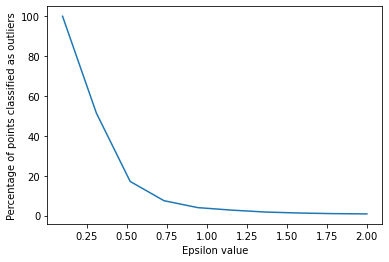

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x=np.linspace(0.1, 2, 10), y=outlier_percent)
plt.ylabel("Percentage of points classified as outliers")
plt.xlabel("Epsilon value")

##### Retraining a DBSCAN model with epsilon value = 0.6, based on the plot created above, and min_samples = 8

In [142]:
eps = 0.6
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="manhattan", algorithm="brute")
dbscan.fit(scaled_X_saturday)

DBSCAN(algorithm='brute', eps=0.6, metric='manhattan', min_samples=8)

In [143]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 1704, 11780,    15,    99,     8,    11,     8,     8,     6,
            5,     8,     8]))

In [144]:
saturday["cluster"] = dbscan.labels_
saturday.head()

,Lat,Lon,Hour,Minutes,DayOfWeek,cluster
93727,40.7138,-74.0066,7,37,Saturday,0
98088,40.6465,-73.7896,22,27,Saturday,2
466158,40.6884,-73.9628,13,45,Saturday,0
519354,40.7226,-73.9890,20,9,Saturday,0
368277,40.7353,-74.0099,21,38,Saturday,0


##### A scatterplot to see how the DBSCAN algorithm has clustered the pick-up points, except outliers, in New York city on Saturdays

In [168]:
fig_saturday_cluster = px.scatter_mapbox(
        saturday[saturday.cluster != -1], 
        lat="Lat", 
        lon="Lon",
        color="cluster",
        mapbox_style="carto-positron"
)

fig_saturday_cluster.show()

## Hot zones per day of week in New York City

## Showing clusters per hour for Sunday

In [146]:
sunday_sort = sunday.sort_values(by=["Hour"])

In [169]:
fig_sunday_cluster = px.scatter_mapbox(
    sunday_sort[sunday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_sunday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Sunday"
      )
img_name = "Traffic by hour on Sunday"
fig_sunday_cluster.write_html(img_name)
fig_sunday_cluster.show()

### Showing clusters per hour for Monday

In [170]:
monday_sort = monday.sort_values(by=["Hour"])
fig_monday_cluster = px.scatter_mapbox(
    monday_sort[monday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_monday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Monday"
      )
img_name = "Traffic by hour on Monday"
fig_monday_cluster.write_html(img_name)
fig_monday_cluster.show()

### Showing clusters per hour for Tuesday

In [171]:
tuesday_sort = tuesday.sort_values(by=["Hour"])
fig_tuesday_cluster = px.scatter_mapbox(
    tuesday_sort[tuesday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_tuesday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Tuesday"
      )
img_name = "Traffic by hour on Tuesday"
fig_tuesday_cluster.write_html(img_name)
fig_tuesday_cluster.show()

### Showing clusters per hour for Wednesday

In [172]:
wednesday_sort = wednesday.sort_values(by=["Hour"])
fig_wednesday_cluster = px.scatter_mapbox(
    wednesday_sort[wednesday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_wednesday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Wednesday"
      )
img_name = "Traffic by hour on Wednesday"
fig_wednesday_cluster.write_html(img_name)
fig_wednesday_cluster.show()

### Showing clusters per hour for Thursday

In [173]:
thursday_sort = thursday.sort_values(by=["Hour"])
fig_thursday_cluster = px.scatter_mapbox(
    thursday_sort[thursday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_thursday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Thursday"
      )
img_name = "Traffic by hour on Thursday"
fig_thursday_cluster.write_html(img_name)
fig_thursday_cluster.show()

### Showing clusters per hour for Friday

In [174]:
friday_sort = friday.sort_values(by=["Hour"])
fig_friday_cluster = px.scatter_mapbox(
    friday_sort[friday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_friday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Friday"
      )
img_name = "Traffic by hour on Friday"
fig_friday_cluster.write_html(img_name)
fig_friday_cluster.show()

### Showing clusters per hour for Saturday

In [175]:
saturday_sort = saturday.sort_values(by=["Hour"])
fig_saturday_cluster = px.scatter_mapbox(
    saturday_sort[saturday_sort.cluster != -1],
    lat="Lat",
    lon="Lon",
    color="cluster",
    mapbox_style="carto-positron",
    color_continuous_scale=None,
    zoom=10,
    animation_frame="Hour",
)


fig_saturday_cluster.update_layout(
    autosize=False,
    width=600,
    height=600,
    showlegend=False,
    title= "Traffic by hour on Saturday"
      )
img_name = "Traffic by hour on Saturday"
fig_saturday_cluster.write_html(img_name)
fig_saturday_cluster.show()

### Picking Sunday to observe how the K-means clustering algorithm behaves

In [215]:
sunday.head()

,Lat,Lon,Hour,Minutes
264036,40.7436,-73.9537,0,15
311372,40.6994,-73.9471,8,44
470569,40.7341,-74.0081,5,13
188566,40.7472,-73.9776,14,59
264925,40.7669,-73.9791,11,48


##### Scaling numerical data and one-hot encoding categorical data

In [216]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
# StandardScaler will substract mean and divide by standard deviation to each observation
sc = StandardScaler()

# Apply StandardScaler to X
X = sc.fit_transform(sunday)

# Visualize first five rows 
# Standard scaler transform X as numpy array. Therefore you can't use .head()
X[:5]

array([[ 0.26172219,  0.28515837, -1.72012334, -0.80713652],
       [-0.82239466,  0.3921136 , -0.56735632,  0.86249029],
       [ 0.02871065, -0.596412  , -0.99964395, -0.9222832 ],
       [ 0.35002131, -0.1021492 ,  0.29721894,  1.72609037],
       [ 0.83321366, -0.12645721, -0.13506869,  1.09278364]])

##### Determining how many clusters we should have using the Elbow method

In [217]:
from sklearn.cluster import KMeans
# Creating a loop that will collect the Within-sum-of-square (wcss) for each value of K 
# Use .inertia_ parameter to get the within sum of square value for each value of K 
wcss =  []
k = []
for i in range (1,11): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=1 --> 35691.99999999995
WCSS for K=2 --> 28872.960992442946
WCSS for K=3 --> 23355.219809138838
WCSS for K=4 --> 18679.64147697494
WCSS for K=5 --> 16375.95966257533
WCSS for K=6 --> 14762.627421479543
WCSS for K=7 --> 13373.642624441172
WCSS for K=8 --> 12028.428629411157
WCSS for K=9 --> 11254.208108326906
WCSS for K=10 --> 10645.522362064748


##### Visualizing inertia as a function of K using plotly

In [218]:
import plotly.express as px

# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe")

##### It can be seen above that after K=4, inertia is not decreasing a lot.

##### Double-checking with the Silhouette method

In [219]:
# Import silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.22648809231413095
Silhouette score for K=3 is 0.26881339777681884
Silhouette score for K=4 is 0.28445428100270004
Silhouette score for K=5 is 0.2769683964415783
Silhouette score for K=6 is 0.2634982199838762
Silhouette score for K=7 is 0.2787769334874289
Silhouette score for K=8 is 0.2892637613689813
Silhouette score for K=9 is 0.27305822633219257
Silhouette score for K=10 is 0.27985843858196413


##### Visualizing inertia as a function of K using plotly

In [220]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster"
)

# Render
#fig.show(renderer="notebook")
fig.show(renderer="iframe") # if using workspace

##### The Silhouette method also suggests that K=4 is appropriate

In [221]:
# Import K-Means 
from sklearn.cluster import KMeans

# Instanciate KMeans with k=3 and initialisation with k-means++
# You should always use k-means++ as it alleviate the problem of local minimum convergence 
kmeans = KMeans(n_clusters=4, init = "k-means++", random_state=0)

# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

##### Checking the coordinates of each cluster centers

<AxesSubplot:>

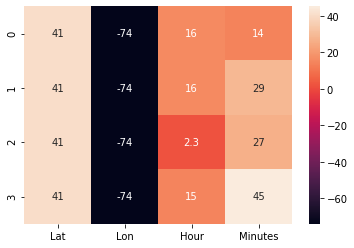

In [223]:
# Cluster centers coordinates
# Let's use inverse transform to have the real coordinates 
cluster_centers = sc.inverse_transform(kmeans.cluster_centers_)

# Let's get column names to facilita understanding 
labels = sunday.columns

# Let's visualize on a heatmap 
## Import Seaborn and pandas 
import seaborn as sns
import pandas as pd 

# Create a heatmap 
sns.heatmap(pd.DataFrame(cluster_centers, columns=labels),  annot=True)

In [224]:
## Create data using numpy 
import numpy as np 
point_1 = np.array([[40.7436, -73.9537, 0, 15]])
point_2 = np.array([[40.6994, -73.9471, 8, 44]])
point_3 = np.array([[40.7341, -74.0081, 5, 13]])
point_4 = np.array([[40.7472, -73.9776, 14, 59]])
point_5 = np.array([[40.7669, -73.9791, 11, 48]])

## Apply standard scaler 
point_1 = sc.transform(point_1)
point_2 = sc.transform(point_2)
point_3 = sc.transform(point_3)
point_4 = sc.transform(point_4)
point_5 = sc.transform(point_5)


## Get cluster 
predict_point_1 = kmeans.predict(point_1)
predict_point_2 = kmeans.predict(point_2)
predict_point_3 = kmeans.predict(point_3)
predict_point_4 = kmeans.predict(point_4)
predict_point_5 = kmeans.predict(point_5)

print("Point 1 belongs to cluster: {}".format(predict_point_1[0]))
print("Point 2 belongs to cluster: {}".format(predict_point_2[0]))
print("Point 3 belongs to cluster: {}".format(predict_point_3[0]))
print("Point 4 belongs to cluster: {}".format(predict_point_4[0]))
print("Point 5 belongs to cluster: {}".format(predict_point_5[0]))

Point 1 belongs to cluster: 2
Point 2 belongs to cluster: 3
Point 3 belongs to cluster: 2
Point 4 belongs to cluster: 3
Point 5 belongs to cluster: 3


##### Conclusion : As far as my knowledge goes in  this domain, K-means algorithm does not seem appropriate to solve this clustering problem